This notebook is part of *The 2019 Australian Open Radar Science Course*.

Copyright (c) Kai Muehlbauer.

Distributed under the BSD 2-Clause "Simplified" License. See LICENSE for more info.

# A Taste of wradlib

As you already know, $\omega radlib$ is a rather low level library. In this notebook some of the features are shown, which should give you an first impression on how to use $\omega radlib$. 

For a more in-depth look into the capabilities of wradlib, please use the notebooks provided in the [VM](https://openradarscience.org/vm-docs/). You also might just start at [wradlib.org](https://wradlib.org/).

## Import needed python packages

In [1]:
import wradlib as wrl
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
import numpy as np
import xarray as xr
import glob
import os
from tqdm import tqdm_notebook as tqdm
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

## Get hold of some  some Australien Radar Data

The `filepath` and the `filename` below have to be set to the correct folder and the correct naming scheme. It is assumed, that data from IDR71 (Sidney) from 20th of December 2018 is used in this notebook.

In [2]:
filepath = os.path.expanduser('~/data/aus/terryhills')
filename = '71_*.pvol.h5'
idr71 = glob.glob(os.path.join(filepath, filename))
idr71.sort(key = lambda x: x.split('.')[1].split('_')[-1])
print("Files available: {}".format(len(idr71)))

Files available: 40


## Claim one volume file

This reads one ODIM_H5 volume file into an xarray backed data structure. Place the cursor inside the `OdimH5` parantheses and press `SHIFT-TAB` to inspect the function parameters. Or just have a look [here](https://docs.wradlib.org/en/stable/generated/wradlib.io.xarray.OdimH5.html).

`dim0=azimuth` means that the first dimension of the dataset will be `azimuth` instead of the CfRadial standard `time`. This has some advantages with ODIM_H5 because the data is azimuth-aligned (0-360 deg in most cases).

Set the index (now 61, counting from the whole day of 240 files) to a reasonable value.

You can try to use keyword `chunks={}`, to read the data into dask chunks if `dask` is available. Especially interesting for the TimeSeries example.

In [3]:
odh = wrl.io.OdimH5(idr71[11], dim0='azimuth')#, chunks={})

## Inspect the data

### CfRadial-like root-object

The `odh` object contains an overview of the contained data in the `root` variable. This is strongly connected to CfRadial standard.

In [4]:
odh.root

<xarray.Dataset>
Dimensions:              (sweep: 14)
Dimensions without coordinates: sweep
Data variables:
    volume_number        int64 0
    platform_type        <U5 'fixed'
    instrument_type      <U5 'radar'
    primary_axis         <U6 'axis_z'
    time_coverage_start  <U20 '2018-12-20T06:06:28Z'
    time_coverage_end    <U20 '2018-12-20T06:10:42Z'
    latitude             float64 -33.7
    longitude            float64 151.2
    altitude             float64 195.0
    altitude_agl         float64 nan
    sweep_group_name     (sweep) <U8 'sweep_1' 'sweep_2' ... 'sweep_14'
    sweep_fixed_angle    (sweep) float64 0.5 0.9 1.3 1.8 ... 13.3 17.9 23.9 32.0
    frequency            float64 nan
    status_xml           <U4 'None'
Attributes:
    Conventions:          Cf/Radial
    version:              H5rad 2.2
    title:                None
    institution:          RAD:AU71,PLC:T/Hills,CTY:500,STN:0
    references:           None
    source:               None
    history:           

## Looking at the sweeps

### Sweep groups

In [5]:
list(odh)

['sweep_1',
 'sweep_2',
 'sweep_3',
 'sweep_4',
 'sweep_5',
 'sweep_6',
 'sweep_7',
 'sweep_8',
 'sweep_9',
 'sweep_10',
 'sweep_11',
 'sweep_12',
 'sweep_13',
 'sweep_14']

### Sweep angles

In [6]:
odh.root.sweep_fixed_angle

<xarray.DataArray 'sweep_fixed_angle' (sweep: 14)>
array([ 0.5,  0.9,  1.3,  1.8,  2.4,  3.1,  4.2,  5.6,  7.4, 10. , 13.3,
       17.9, 23.9, 32. ])
Dimensions without coordinates: sweep

### Inspect one sweep

All relevant and needed dimensions and coordinates as well as the radar moments itself are combined into one xarray Dataset. You can also play with the other sweeps by subsetting `odh` accordingly.

All Xarray features (selecting, indexing, ufuncs etc) can be used with the sweep datasets. 

In [7]:
swp1 = odh['sweep_1'] 
swp1

<xarray.Dataset>
Dimensions:       (azimuth: 360, range: 1200)
Coordinates:
  * azimuth       (azimuth) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation     (azimuth) float32 ...
  * range         (range) float32 125.0 375.0 625.0 ... 299625.0 299875.0
    sweep_mode    <U20 ...
    longitude     float64 ...
    latitude      float64 ...
    altitude      float64 ...
    time          (azimuth) datetime64[ns] ...
Data variables:
    DBZH          (azimuth, range) float32 ...
    VRADH         (azimuth, range) float32 ...
    WRADH         (azimuth, range) float32 ...
    TH            (azimuth, range) float32 ...
    ZDR           (azimuth, range) float32 ...
    RHOHV         (azimuth, range) float32 ...
    PHIDP         (azimuth, range) float32 ...
    KDP           (azimuth, range) float32 ...
    SNRH          (azimuth, range) float32 ...
    sweep_number  int64 ...
    follow_mode   <U4 ...
    prt_mode      <U5 ...
    fixed_angle   float64 ...

### Inspect one moment

Same here, all Xarray features can be used with the DataArray.

In [8]:
swp1.DBZH

<xarray.DataArray 'DBZH' (azimuth: 360, range: 1200)>
[432000 values with dtype=float32]
Coordinates:
  * azimuth     (azimuth) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation   (azimuth) float32 ...
  * range       (range) float32 125.0 375.0 625.0 ... 299375.0 299625.0 299875.0
    sweep_mode  <U20 ...
    longitude   float64 ...
    latitude    float64 ...
    altitude    float64 ...
    time        (azimuth) datetime64[ns] ...
Attributes:
    IMAGE_VERSION:  1.2
    standard_name:  radar_equivalent_reflectivity_factor_h
    long_name:      Equivalent reflectivity factor H
    units:          dBZ

### Simple Plots using Xarray machinery

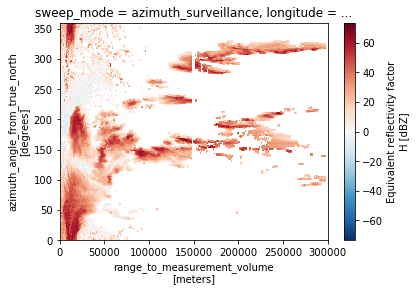

In [9]:
odh['sweep_1'].DBZH.plot()

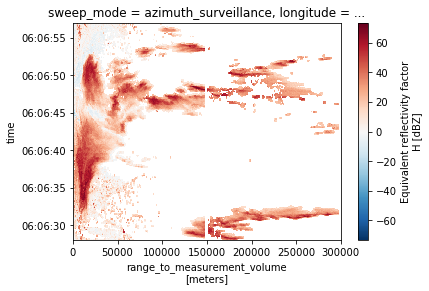

In [10]:
odh['sweep_1'].DBZH.sortby('time').plot(y='time')

## Georeferencing sweeps

`xyz`-Coordinates of all radar bins are added to the Dataset in Azimthal Equidistant Projection with the radar as center. Also `gr` (ground range), `rays` and `bins` are added for nicer plotting.

In [11]:
swp1 = swp1.pipe(wrl.georef.georeference_dataset)
swp1

<xarray.Dataset>
Dimensions:       (azimuth: 360, range: 1200)
Coordinates:
  * azimuth       (azimuth) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation     (azimuth) float32 ...
  * range         (range) float32 125.0 375.0 625.0 ... 299625.0 299875.0
    sweep_mode    <U20 ...
    longitude     float64 ...
    latitude      float64 ...
    altitude      float64 ...
    time          (azimuth) datetime64[ns] ...
    x             (azimuth, range) float32 1.0907533 3.2722592 ... -2614.8013
    y             (azimuth, range) float32 124.98758 374.96265 ... 299628.66
    z             (azimuth, range) float32 197.0 199.0 201.0 ... 8090.0 8101.0
    gr            (azimuth, range) float32 124.99233 374.97693 ... 299640.06
    rays          (azimuth, range) float32 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins          (azimuth, range) float32 125.0 375.0 ... 299625.0 299875.0
Data variables:
    DBZH          (azimuth, range) float32 ...
    VRADH         (azimuth, range)

### Simple georeferenced plot

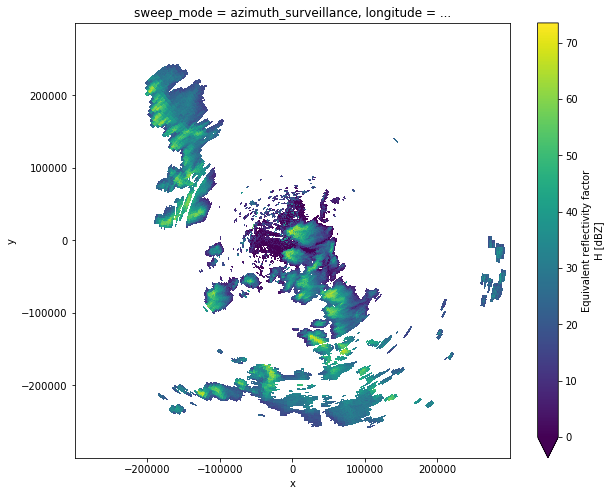

In [12]:
fig = pl.figure(figsize=(10,8))
swp1.DBZH.plot.pcolormesh(x='x', y='y', cmap='viridis', vmin=0)
pl.gca().set_aspect('equal')

### Use wradlib-Accessor to create curvelinear grid plot

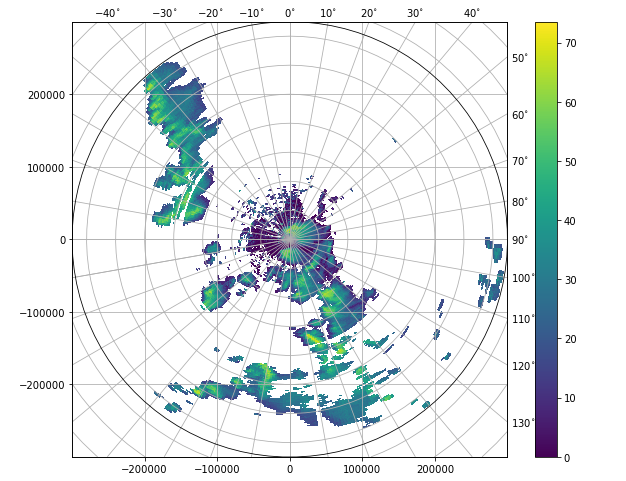

In [13]:
fig = pl.figure(figsize=(10,8))
qm = swp1.DBZH.wradlib.plot_ppi(proj='cg', fig=fig, vmin=0)
pl.colorbar(qm)

### Use cartopy machinery to plot on map projections

In [14]:
lat = swp1.latitude.values
lon = swp1.longitude.values

In [15]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### Just AEQD, no fancy stuff

< GeoAxes: <cartopy.crs.AzimuthalEquidistant object at 0x7f350e381468> >


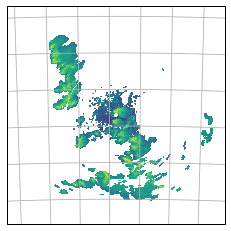

In [16]:
map_proj = ccrs.AzimuthalEquidistant(central_latitude=lat, central_longitude=lon)
pm = swp1.DBZH.wradlib.plot_ppi(proj=map_proj)
ax = pl.gca()
ax.gridlines()
print(ax)

#### Mercator

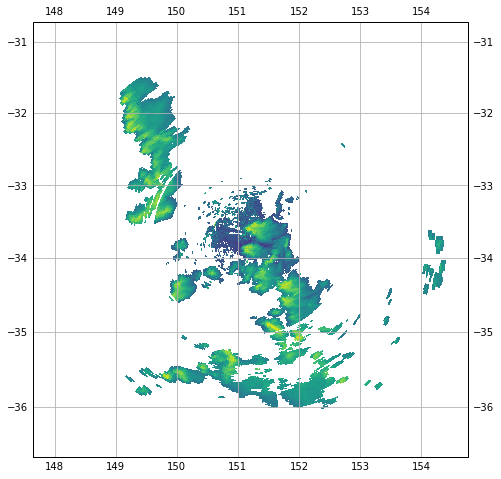

In [17]:
map_proj = ccrs.Mercator(central_longitude=lon)
fig = pl.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection=map_proj)
pm = swp1.DBZH.wradlib.plot_ppi(ax=ax)
ax.gridlines(draw_labels=True)

#### Mercator using cartopy features

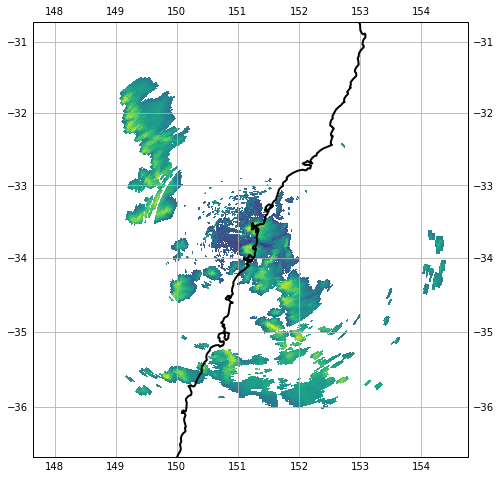

In [18]:
import cartopy.feature as cfeature
def plot_lines(ax):
    coast = cfeature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='10m',
                                           facecolor='none')
    ax.add_feature(coast, edgecolor='black', lw=2, zorder=4)

map_proj = ccrs.Mercator(central_longitude=lon)
fig = pl.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection=map_proj)

pm = swp1.DBZH.wradlib.plot_ppi(ax=ax)
plot_lines(ax)
ax.gridlines(draw_labels=True)

## Quasi Vertical Profile (QVP)

This example shows how to create a so called QVP. We need to define a function to add a height coordinate for plotting.

In [19]:
def add_height(ds):
    ds = ds.pipe(wrl.georef.georeference_dataset)
    height = ds.z.mean('azimuth')
    ds = ds.assign_coords({'height': (['range'], height)})
    return ds

### Single Profile

Here we add the height coordinate and calculate the `mean` over the azimuth using the sweep with the highest available elevation.

In [20]:
swp14 = odh['sweep_14'].pipe(add_height)
qvp = swp14.mean('azimuth')
qvp

<xarray.Dataset>
Dimensions:       (range: 200)
Coordinates:
  * range         (range) float32 125.0 375.0 625.0 ... 49375.0 49625.0 49875.0
    sweep_mode    <U20 ...
    longitude     float64 ...
    latitude      float64 ...
    altitude      float64 ...
    height        (range) float32 262.0 395.0 527.0 ... 26463.0 26597.0 26730.0
Data variables:
    DBZH          (range) float32 0.78571427 -3.1394367 -0.029166667 ... nan nan
    VRADH         (range) float32 0.30942217 -0.7060213 -0.87736607 ... nan nan
    WRADH         (range) float32 7.25253 4.2895927 3.71423 ... nan nan nan
    TH            (range) float32 15.123611 1.1986111 3.6208334 ... nan nan nan
    ZDR           (range) float32 -3.4443288 1.3683096 1.4155542 ... nan nan nan
    RHOHV         (range) float32 0.1838574 0.6752606 0.6978871 ... nan nan nan
    PHIDP         (range) float32 157.0394 106.63389 107.57874 ... nan nan nan
    KDP           (range) float32 nan nan nan nan nan ... nan nan nan nan nan
    SNRH   

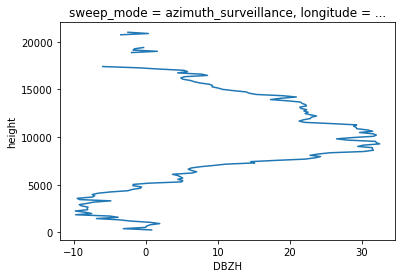

In [21]:
qvp.DBZH.plot(y='height')

### TimeSeries QVP

The following is preliminary code which is currently implemented in wradlib and will be available in the next version. There are some glitches which have to be fixed, yet, see below.

This loads multiple volumes and combines the sweeps (here only one sweep) along a new time dimension.

In [22]:
ts = {}
ts['fh'] = []
ts['swp'] = []
for f in tqdm(idr71, desc='Collecting', unit=' Files'):
    fh = wrl.io.OdimH5(f, dim0='azimuth', chunks={})
    ts['fh'].append(fh)
    ds = fh['sweep_14']
    # reassign time 
    ds = ds.rename({'time': 'rtime'})
    ds = ds.assign_coords({'time': (['time'], [ds['rtime'].min().values])})
    ts['swp'].append(ds)

#### Concat Datasets along time

In [23]:
ts['swp'] = xr.concat(ts['swp'], 'time')

#### Fix some coordinates

In [24]:
# fix latitude, longitude
ts['swp'] = ts['swp'].assign_coords({'longitude': ts['swp'].longitude.min(),
                                     'latitude': ts['swp'].latitude.min()})

#### Georeference and add height coordinate

In [25]:
ts['swp'] = ts['swp'].pipe(wrl.georef.georeference_dataset).pipe(add_height)
ts['swp']

<xarray.Dataset>
Dimensions:       (azimuth: 360, range: 200, time: 40)
Coordinates:
    sweep_mode    <U20 'azimuth_surveillance'
    altitude      float64 195.0
    elevation     (azimuth) float32 32.0 32.0 32.0 32.0 ... 32.0 32.0 32.0 32.0
  * azimuth       (azimuth) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * range         (range) float32 125.0 375.0 625.0 ... 49375.0 49625.0 49875.0
    longitude     float64 151.2
    latitude      float64 -33.7
    rtime         (time, azimuth) datetime64[ns] 2018-12-20T05:04:41.731922688 ... 2018-12-20T08:58:43.356925696
  * time          (time) datetime64[ns] 2018-12-20T05:04:32.015277824 ... 2018-12-20T08:58:35.015277824
    x             (azimuth, range) float32 0.9250394 2.7750747 ... -367.94223
    y             (azimuth, range) float32 105.9987 317.99112 ... 42162.3
    z             (azimuth, range) float32 262.0 395.0 527.0 ... 26597.0 26730.0
    gr            (azimuth, range) float32 106.00274 318.00323 ... 42163.906
    ra

#### Calculate QVP

In [26]:
ts_qvp = ts['swp'].mean('azimuth')
ts_qvp

<xarray.Dataset>
Dimensions:       (range: 200, time: 40)
Coordinates:
    sweep_mode    <U20 'azimuth_surveillance'
    altitude      float64 195.0
  * range         (range) float32 125.0 375.0 625.0 ... 49375.0 49625.0 49875.0
    longitude     float64 151.2
    latitude      float64 -33.7
  * time          (time) datetime64[ns] 2018-12-20T05:04:32.015277824 ... 2018-12-20T08:58:35.015277824
    height        (range) float32 262.0 395.0 527.0 ... 26463.0 26597.0 26730.0
Data variables:
    DBZH          (time, range) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
    VRADH         (time, range) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
    WRADH         (time, range) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
    TH            (time, range) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
    ZDR           (time, range) float32 dask.array<chunksize=(1, 200), meta=np.ndarray>
    RHOHV         (time, range) float32 dask.array<chunksize=(1, 20

#### Plot QVP using discrete colorbar

Text(0.5, 1.0, 'Quasi Vertical Profile')

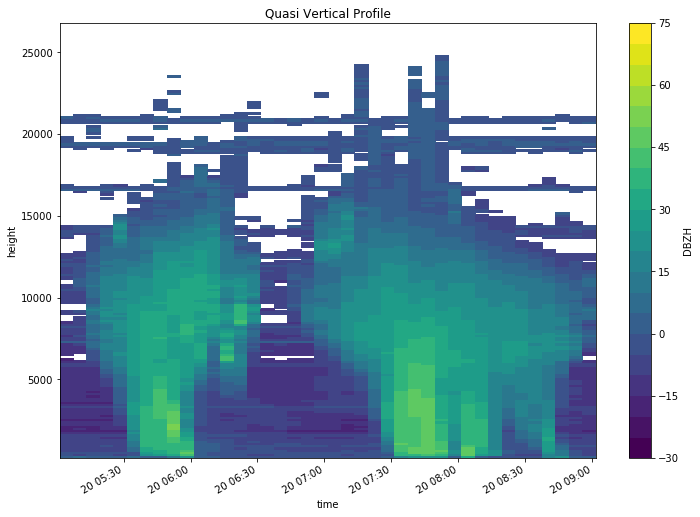

In [27]:
fig = pl.figure(figsize=(12,8))
levels = np.arange(-30, 80, 5)
ts_qvp.DBZH.plot(x='time', y='height', cmap='viridis', levels=levels)
pl.gca().set_title('Quasi Vertical Profile')

## Simple Clutter Filter

This extracts clutter information using a approach published by Gabella.

### Define function to be used with Xarray Dataset

In [28]:
def extract_clutter(ds):
    clmap = wrl.clutter.filter_gabella(ds.DBZH.values,
                                       wsize=5,
                                       thrsnorain=0.,
                                       tr1=6.,
                                       n_p=8,
                                       tr2=1.3, 
                                       rm_nans=False)
    ds = ds.assign({'CMAP': (ds.DBZH.dims, clmap)})
    return ds

### Pipe the function, which returns a Dataset with added `CMAP` 

In [29]:
swp1 = swp1.pipe(extract_clutter)
swp1

<xarray.Dataset>
Dimensions:       (azimuth: 360, range: 1200)
Coordinates:
  * azimuth       (azimuth) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation     (azimuth) float32 ...
  * range         (range) float32 125.0 375.0 625.0 ... 299625.0 299875.0
    sweep_mode    <U20 ...
    longitude     float64 ...
    latitude      float64 ...
    altitude      float64 ...
    time          (azimuth) datetime64[ns] ...
    x             (azimuth, range) float32 1.0907533 3.2722592 ... -2614.8013
    y             (azimuth, range) float32 124.98758 374.96265 ... 299628.66
    z             (azimuth, range) float32 197.0 199.0 201.0 ... 8090.0 8101.0
    gr            (azimuth, range) float32 124.99233 374.97693 ... 299640.06
    rays          (azimuth, range) float32 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins          (azimuth, range) float32 125.0 375.0 ... 299625.0 299875.0
Data variables:
    DBZH          (azimuth, range) float32 ...
    VRADH         (azimuth, range)

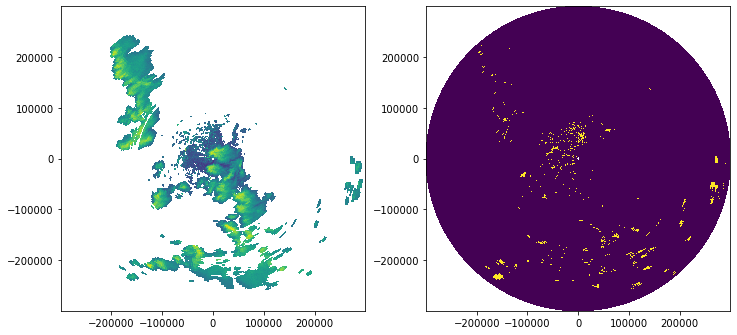

In [30]:
fig = pl.figure(figsize=(12,8))
swp1.DBZH.wradlib.plot(ax=121, fig=fig)
swp1.CMAP.wradlib.plot(ax=122, fig=fig)

## Dual-Pol retrievals

This is just one example for using dual pol moments. Here we facilitate `RHOHV` and `ZDR` to calculate Depolarization Ratio.

### Depolarizaton Ratio

We create the function, to be used with the Xarray Dataset, pipe it and create the diagnostic plot.

In [31]:
def depol(ds):
    dep = wrl.dp.depolarization(ds.ZDR.values,
                                ds.RHOHV.values)
    ds = ds.assign({'DR': (ds.DBZH.dims, dep)})
    return ds

In [32]:
swp1 = swp1.pipe(depol)
swp1

<xarray.Dataset>
Dimensions:       (azimuth: 360, range: 1200)
Coordinates:
  * azimuth       (azimuth) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation     (azimuth) float32 ...
  * range         (range) float32 125.0 375.0 625.0 ... 299625.0 299875.0
    sweep_mode    <U20 ...
    longitude     float64 ...
    latitude      float64 ...
    altitude      float64 ...
    time          (azimuth) datetime64[ns] ...
    x             (azimuth, range) float32 1.0907533 3.2722592 ... -2614.8013
    y             (azimuth, range) float32 124.98758 374.96265 ... 299628.66
    z             (azimuth, range) float32 197.0 199.0 201.0 ... 8090.0 8101.0
    gr            (azimuth, range) float32 124.99233 374.97693 ... 299640.06
    rays          (azimuth, range) float32 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins          (azimuth, range) float32 125.0 375.0 ... 299625.0 299875.0
Data variables:
    DBZH          (azimuth, range) float32 ...
    VRADH         (azimuth, range)

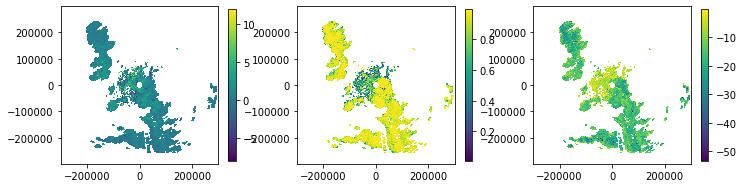

In [33]:
fig = pl.figure(figsize=(12,8))
qm = swp1.ZDR.wradlib.plot(ax=131, fig=fig)
pl.colorbar(qm, pad=0.05, shrink=0.35)
qm = swp1.RHOHV.wradlib.plot(ax=132, fig=fig)
pl.colorbar(qm, pad=0.05, shrink=0.35)
qm = swp1.DR.wradlib.plot(ax=133, fig=fig)
pl.colorbar(qm, pad=0.05, shrink=0.35)

## Create 3D-Volume

This is just one example of creating a 3D representation of the volume data.

### Iterate over the sweeps and extract coordinates and data

This takes the radar location and the given projection into account. Here: using UTM65S, for Sydney radar. Change accordingly for other radar locations.

In [34]:
from osgeo import osr
proj = osr.SpatialReference()
proj.ImportFromEPSG(32756)
xyz, data = np.array([]).reshape((-1, 3)), np.array([])
for swp in odh.values():
    xyz_ = wrl.vpr.volcoords_from_polar(odh.location, swp.fixed_angle.values,
                                        swp.azimuth.values, swp.range.values, proj=proj)
    xyz, data = np.vstack((xyz, xyz_)), np.append(data, swp.DBZH.values.ravel())

### Initialize Volume Parameters

Try with the given set of parameters. If the processing time is small, then increase `maxalt` until you see the storm top. Increase horizontal and vertical resolution for more details.

In [35]:
import datetime as dt
# generate 3-D Cartesian target grid coordinates
maxrange = 200000.
minelev = 0.1
maxelev = 25.
maxalt = 5000.
horiz_res = 2000.
vert_res = 250.
trgxyz, trgshape = wrl.vpr.make_3d_grid(odh.location, proj, maxrange,
                                        maxalt, horiz_res, vert_res)

# interpolate to Cartesian 3-D volume grid
tstart = dt.datetime.now()
gridder = wrl.vpr.CAPPI(xyz, trgxyz, trgshape, maxrange, minelev,
                        maxelev)
vol = np.ma.masked_invalid(gridder(data).reshape(trgshape))
print("3-D interpolation took:", dt.datetime.now() - tstart)

3-D interpolation took: 0:00:00.968648


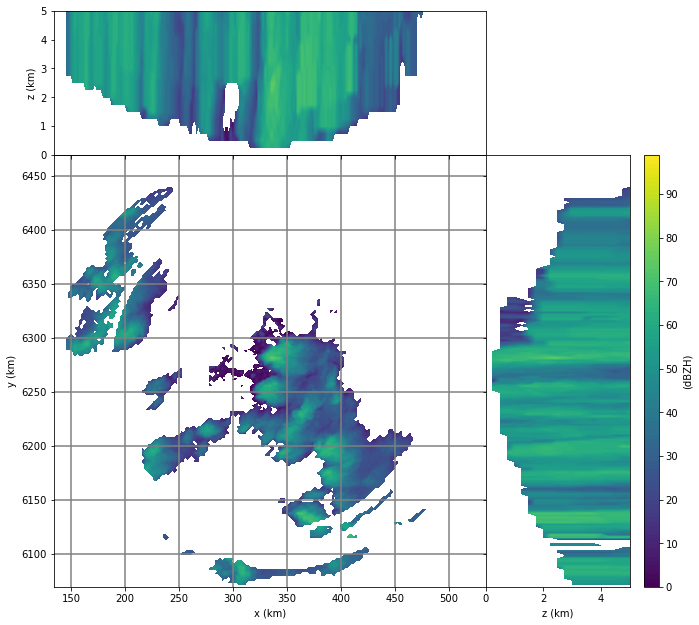

In [36]:
# diagnostic plot
trgx = trgxyz[:, 0].reshape(trgshape)[0, 0, :]
trgy = trgxyz[:, 1].reshape(trgshape)[0, :, 0]
trgz = trgxyz[:, 2].reshape(trgshape)[:, 0, 0]
wrl.vis.plot_max_plan_and_vert(trgx, trgy, trgz, vol, unit="dBZH",
                               levels=range(0, 100))